This file shows the example use of a Restricted Boltzmann Machine (RBM) to recreate the results achieved in this paper: [https://journals.aps.org/prx/abstract/10.1103/PhysRevX.7.031014](Stochastic p-Bits for Invertible Logic)

Instead of using a +1, -1 spin for representing the two binary states for the RBM, I used the +1, 0 version, which results in a different activation function, which is sigmoid.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import RestrictedBoltzmannMachine as RBM
import itertools as it
%matplotlib inline

In [2]:
W = np.matrix([ [-9, -12, 4], [-9, 4, -12], [-1, -10, -10] ])
visible_biases = np.matrix([6, 6, 4]).T
hidden_biases = np.matrix([4, 6, 6]).T
my_rbm = RBM.RestrictedBoltzmannMachine(visible_biases, hidden_biases, W)

In [3]:
gibbs_res = my_rbm.prob_v_gibbs_sampling()

brute_res = []
for v in it.product(range(2), repeat=3):
    brute_res.append(my_rbm.prob_v_brute_force(np.matrix([v[0], v[1], v[2]]).T)) 

softplus_res = []
for v in it.product(range(2), repeat=3):
    softplus_res.append(my_rbm.prob_v_softplus(np.matrix([v[0], v[1], v[2]]).T))
print(gibbs_res)
print(brute_res)
print(softplus_res)

[0.2692, 0.0, 0.2417, 0.0022, 0.2465, 0.0012, 0.0054, 0.2338]
[0.25109535439938624, 3.2962612122568e-05, 0.2476379744805115, 0.0012193945255676, 0.2476379744805115, 0.0012193945255676, 0.005792641009070815, 0.24536430396726253]
[0.2510953543993856, 3.296261212256801e-05, 0.24763797448051172, 0.0012193945255676, 0.24763797448051172, 0.0012193945255676, 0.005792641009070822, 0.245364303967263]


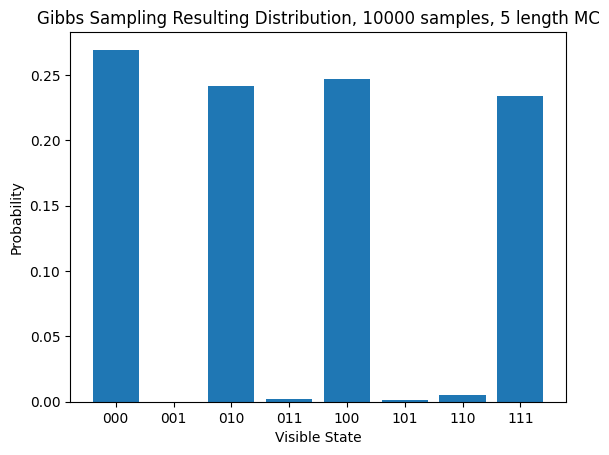

In [4]:
plt.title("Gibbs Sampling Resulting Distribution, 10000 samples, 5 length MC")
plt.ylabel('Probability')
plt.xlabel('Visible State')
plt.bar([0,1,2,3,4,5,6,7], gibbs_res)
plt.xticks([0,1,2,3,4,5,6,7],['000', '001', '010', '011', '100', '101', '110', '111'])
plt.show()

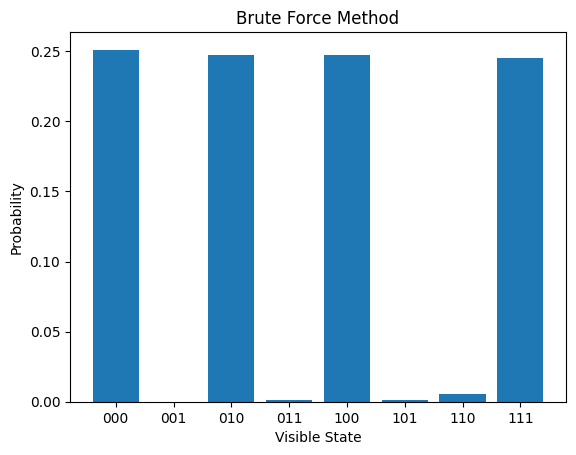

In [5]:
plt.title("Brute Force Method")
plt.bar([0,1,2,3,4,5,6,7], brute_res)
plt.ylabel('Probability')
plt.xlabel('Visible State')
plt.xticks([0,1,2,3,4,5,6,7],['000', '001', '010', '011', '100', '101', '110', '111'])
plt.show()

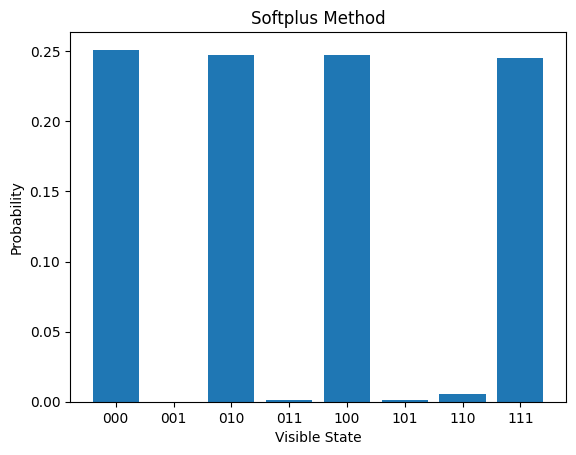

In [6]:
plt.title("Softplus Method")
plt.bar([0,1,2,3,4,5,6,7], softplus_res)
plt.ylabel('Probability')
plt.xlabel('Visible State')
plt.xticks([0,1,2,3,4,5,6,7],['000', '001', '010', '011', '100', '101', '110', '111'])
plt.show()